In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random as random
import math as math

In [21]:
HeimMannschaft = "Wolfsburg"
AusMannschaft = "Bayern"
TorGeschHeim = 1.89
TorGeschAus = 2.14
GegentoreHeim = 1.35
GegentoreAus = 0.78

PrgTorHeim =  ( TorGeschHeim * GegentoreAus  ) ** 0.5
PrgTorAus  =  ( TorGeschAus  * GegentoreHeim ) ** 0.5

print( HeimMannschaft + " " + str(PrgTorHeim) + " : " + str(PrgTorAus)+ " " + AusMannschaft)

Wolfsburg 1.2141663806908838 : 1.6997058569058354 Bayern


In [22]:
# Formel der Poisson-Verteilung
def poisson(k, lambda_):
    return (math.exp(-1*lambda_) * lambda_**k) / math.factorial(k)

In [23]:
for TheoHeimTore in range(0,6):
    for TheoAusTore in range(0,6):
        p = poisson(TheoHeimTore, PrgTorHeim)*poisson(TheoAusTore, PrgTorAus)
        
        print("Das Ergebnis " + str(TheoHeimTore) + " : " +  str(TheoAusTore) + " tritt zu " + str(p*100) + " % ein."  )

Das Ergebnis 0 : 0 tritt zu 5.426519478388549 % ein.
Das Ergebnis 0 : 1 tritt zu 9.223486940030616 % ein.
Das Ergebnis 0 : 2 tritt zu 7.838607386532261 % ein.
Das Ergebnis 0 : 3 tritt zu 4.441108961624742 % ein.
Das Ergebnis 0 : 4 tritt zu 1.8871447283076417 % ein.
Das Ergebnis 0 : 5 tritt zu 0.641518189506694 % ein.
Das Ergebnis 1 : 0 tritt zu 6.5886975148236075 % ein.
Das Ergebnis 1 : 1 tritt zu 11.198847755326609 % ein.
Das Ergebnis 1 : 2 tritt zu 9.517373560162703 % ein.
Das Ergebnis 1 : 3 tritt zu 5.392245194189763 % ein.
Das Ergebnis 1 : 4 tritt zu 2.2913076846091704 % ein.
Das Ergebnis 1 : 5 tritt zu 0.7789098183007113 % ein.
Das Ergebnis 2 : 0 tritt zu 3.9998875075202003 % ein.
Das Ergebnis 2 : 1 tritt zu 6.798632223496568 % ein.
Das Ergebnis 2 : 2 tritt zu 5.77783750461293 % ein.
Das Ergebnis 2 : 3 tritt zu 3.2735414156135976 % ein.
Das Ergebnis 2 : 4 tritt zu 1.391014379235563 % ein.
Das Ergebnis 2 : 5 tritt zu 0.47286305748538426 % ein.
Das Ergebnis 3 : 0 tritt zu 1.61884297

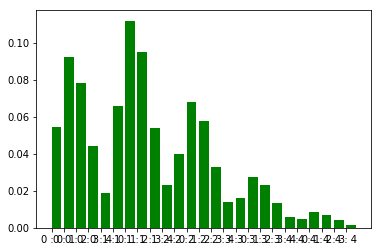

In [24]:
Ergebnis = []
p = []
maxTore = 5

#Wahrscheinlichkeiten berechnen
for TheoHeimTore in range(0,maxTore):
    for TheoAusTore in range(0,maxTore):
        Ergebnis.append(str(TheoHeimTore) + " : " + str(TheoAusTore))
        p.append(poisson(TheoHeimTore, PrgTorHeim)*poisson(TheoAusTore, PrgTorAus))
        
#Balkendiagram
index = np.arange(len(Ergebnis))
bar_width = 1
plt.bar(Ergebnis, p, align='edge', color="green")
plt.show()


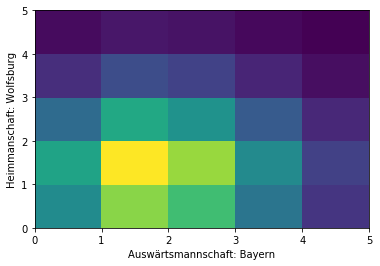

In [25]:
#Farbfeld
TheoHeimTore, TheoAusTore = np.arange(5), np.arange(5)
Feld = [[0] * maxTore for i in range(maxTore)]

for TheoHeimTore in range(0,maxTore):
    for TheoAusTore in range(0,maxTore):
        Feld[TheoHeimTore][TheoAusTore] = poisson(TheoHeimTore, PrgTorHeim)*poisson(TheoAusTore, PrgTorAus)*100
        

plt.ylabel('Heimmanschaft: ' + HeimMannschaft)  
plt.xlabel('Auswärtsmannschaft: '+ AusMannschaft)
plt.pcolor(Feld)
plt.show()

In [18]:
#Sucht maximal Wahrscheinlichkeit mit Ergebnis
for TheoHeimTore in range(0,maxTore):
    for TheoAusTore in range(0,maxTore):
        if max(p) == poisson(TheoHeimTore, PrgTorHeim)*poisson(TheoAusTore, PrgTorAus):
            print( "Das Ergebnis " + str(TheoHeimTore) +  " : "  + str(TheoAusTore) + " hat die höchste Wahrscheinlichkeit mit " + str(max(p)*100) + " %.")

Das Ergebnis 1 : 1 hat die höchste Wahrscheinlichkeit mit 11.198847755326609 %.


In [19]:
Unent = 0
HeimSieg = 0
AusSieg = 0
GroßeZahl = 10 #damit man 100% annähert

for TheoHeimTore in range(0,GroßeZahl):
    for TheoAusTore in range(0,GroßeZahl):
        
        if TheoHeimTore == TheoAusTore:
            Unent = Unent + poisson(TheoHeimTore, PrgTorHeim)*poisson(TheoAusTore, PrgTorAus)
            
        if TheoHeimTore < TheoAusTore:
            AusSieg = AusSieg + poisson(TheoHeimTore, PrgTorHeim)*poisson(TheoAusTore, PrgTorAus)
            
        if TheoHeimTore > TheoAusTore:
            HeimSieg = HeimSieg + poisson(TheoHeimTore, PrgTorHeim)*poisson(TheoAusTore, PrgTorAus)
        
        
print( "Sieg Heimmannschaft " + HeimMannschaft + ": "+ str(HeimSieg*100) + " %")
print( "Sieg Auswärtmannschaft " + AusMannschaft + ": "+ str(AusSieg*100) + " %")
print( "Unentschieden: "+ str(Unent*100) + " %")

Sieg Heimmannschaft Wolfsburg: 27.326162342670145 %
Sieg Auswärtmannschaft Bayern: 48.75866233492213 %
Unentschieden: 23.91391583071526 %
